In [ ]:
!pip install feedparser

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import necessary libraries
import feedparser
import pandas as pd
import datetime

# Define the company you want to get news articles for
company = 'Tesla'

# Define the date range (last 30 days)
today = datetime.date.today()
last_month = today - datetime.timedelta(days=30)

# Create an empty list to store the articles
articles = []

# Loop through each day in the date range
current_day = last_month
while current_day <= today:
    # Format the date as a string
    date_string = current_day.strftime('%Y-%m-%d')

    # Get the news articles for the current day
    url = f'https://news.google.com/rss/search?q={company}%20after:{date_string}&hl=en-US&gl=US&ceid=US:en'
    news = feedparser.parse(url)

    # Add the articles to the list
    for article in news.entries:
        articles.append({
            'title': article.title,
            'description': article.summary,
            'link': article.link,
            'published': article.published
        })

    # Move on to the next day
    current_day += datetime.timedelta(days=1)

# Convert the list of articles to a Pandas DataFrame
df = pd.DataFrame(articles)

# Print the DataFrame
print(df.head())


                                               title  \
0  Elon Musk Says Tesla Will Build Shanghai Batte...   
1  Tesla employees shared private footage from cu...   
2  Tesla is about to launch a big new software up...   
3  2023.12 Official Tesla Release Notes - Softwar...   
4  FSD Beta 11.3.6 (2022.45.15) Official Tesla Re...   

                                         description  \
0  <ol><li><a href="https://news.google.com/rss/a...   
1  <ol><li><a href="https://news.google.com/rss/a...   
2  <a href="https://news.google.com/rss/articles/...   
3  <a href="https://news.google.com/rss/articles/...   
4  <a href="https://news.google.com/rss/articles/...   

                                                link  \
0  https://news.google.com/rss/articles/CBMiWWh0d...   
1  https://news.google.com/rss/articles/CBMiWGh0d...   
2  https://news.google.com/rss/articles/CBMiYWh0d...   
3  https://news.google.com/rss/articles/CBMiS2h0d...   
4  https://news.google.com/rss/articles/CBMiTm

In [ ]:
df

,title,description,link,published
0,Elon Musk Says Tesla Will Build Shanghai Batte...,"<ol><li><a href=""https://news.google.com/rss/a...",https://news.google.com/rss/articles/CBMiWWh0d...,"Mon, 10 Apr 2023 08:25:00 GMT"
1,Tesla employees shared private footage from cu...,"<ol><li><a href=""https://news.google.com/rss/a...",https://news.google.com/rss/articles/CBMiWGh0d...,"Sun, 09 Apr 2023 01:23:00 GMT"
2,Tesla is about to launch a big new software up...,"<a href=""https://news.google.com/rss/articles/...",https://news.google.com/rss/articles/CBMiYWh0d...,"Mon, 10 Apr 2023 15:05:00 GMT"
3,2023.12 Official Tesla Release Notes - Softwar...,"<a href=""https://news.google.com/rss/articles/...",https://news.google.com/rss/articles/CBMiS2h0d...,"Mon, 10 Apr 2023 12:16:48 GMT"
4,FSD Beta 11.3.6 (2022.45.15) Official Tesla Re...,"<a href=""https://news.google.com/rss/articles/...",https://news.google.com/rss/articles/CBMiTmh0d...,"Sat, 08 Apr 2023 20:03:45 GMT"
...,...,...,...,...
3162,Monday Digest: Uber's new spinout; Solar rush ...,"<a href=""https://news.google.com/rss/articles/...",https://news.google.com/rss/articles/CBMiYWh0d...,"Mon, 10 Apr 2023 15:24:00 GMT"
3163,"ROSEN, A GLOBAL AND LEADING LAW FIRM, Encourag...","<a href=""https://news.google.com/rss/articles/...",https://news.google.com/rss/articles/CBMiwQFod...,"Mon, 10 Apr 2023 17:14:46 GMT"
3164,Tesla to Reveal 'Official Statement Soon' in R...,"<a href=""https://news.google.com/rss/articles/...",https://news.google.com/rss/articles/CBMilQFod...,"Mon, 10 Apr 2023 22:00:08 GMT"
3165,Everybody needs good neighbours (like Tesla) -...,"<a href=""https://news.google.com/rss/articles/...",https://news.google.com/rss/articles/CBMisAFod...,"Tue, 11 Apr 2023 01:05:25 GMT"


In [ ]:
!pip install GoogleNews

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Install the GoogleNews library
!pip install GoogleNews

# Import necessary libraries
from GoogleNews import GoogleNews
import pandas as pd
import datetime

# Set up the Google News API
googlenews = GoogleNews()

# Define the company you want to get news articles for
company = 'Tesla'

# Define the date range (last 30 days)
today = datetime.date.today()
last_month = today - datetime.timedelta(days=30)

# Create an empty list to store the articles
articles = []

# Loop through each day in the date range
current_day = last_month
while current_day <= today:
    # Format the date as a string
    date_string = current_day.strftime('%m/%d/%Y')

    # Define the API parameters
    query = company
    period = 'd30'
    custom_query = f'{query} after:{date_string} before:{today.strftime("%m/%d/%Y")}'
    googlenews.clear()
    googlenews.search(custom_query)
    googlenews.get_page(1)

    # Send the API request
    response = googlenews.result()

    # Add the articles to the list
    for article in response:
        articles.append({
            'title': article['title'],
            'description': article['desc'],
            'link': article['link'],
            'published': article['date']
        })

    # Move on to the next day
    current_day += datetime.timedelta(days=1)

# Convert the list of articles to a Pandas DataFrame
df = pd.DataFrame(articles)

# Print the DataFrame
print(df.head())


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
                                               title  \
0  Dividend Calendar as of Apr 8th | Dividends Today   
1  Dividend Calendar as of Apr 8th | Dividends Today   
2  Dividend Calendar as of Apr 8th | Dividends Today   
3  Dividend Calendar as of Apr 8th | Dividends Today   
4  Dividend Calendar as of Apr 8th | Dividends Today   

                                         description  \
0  The table below is a list vie

In [ ]:
df

,title,description,link,published
0,Dividend Calendar as of Apr 8th | Dividends Today,The table below is a list view calendar of sto...,https://www.benzinga.com/calendars/dividends,"Apr 19, 2021"
1,Dividend Calendar as of Apr 8th | Dividends Today,The table below is a list view calendar of sto...,https://www.benzinga.com/calendars/dividends,"Apr 19, 2021"
2,Dividend Calendar as of Apr 8th | Dividends Today,The table below is a list view calendar of sto...,https://www.benzinga.com/calendars/dividends,"Apr 19, 2021"
3,Dividend Calendar as of Apr 8th | Dividends Today,The table below is a list view calendar of sto...,https://www.benzinga.com/calendars/dividends,"Apr 19, 2021"
4,Dividend Calendar as of Apr 8th | Dividends Today,The table below is a list view calendar of sto...,https://www.benzinga.com/calendars/dividends,"Apr 19, 2021"
...,...,...,...,...
69,Ford Stock Down Four Percent During Week Of Fe...,Ford stock dipped by four percent or $0.50 per...,https://fordauthority.com/2023/02/ford-stock-v...,"Feb 11, 2023"
70,2023 Toyota GR86 could welcome a 10th annivers...,A VIN decoder document Subaru sent to the Nati...,https://www.autoblog.com/2022/04/11/2023-toyot...,"pr 11, 2022"
71,Conference Calls,"Also known as an earnings call, a conference c...",https://www.benzinga.com/calendars/conference-...,"Apr 23, 2021"
72,Upcoming Stock Splits,A stock split consists of an action taken by a...,https://www.benzinga.com/calendars/stock-splits,"Apr 20, 2021"


In [ ]:
import requests
import pandas as pd

url = 'https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=AAPL&limit=200&apikey=M3313X5M5V6BJGMO'
r = requests.get(url)
data = r.json()

# Normalize the JSON data into a pandas dataframe
df = pd.json_normalize(data['feed'])

# Print the dataframe
print(df)


                                                 title  \
0    Amid big drop in sales, PC makers may soon be ...   
1    TSLA, AAPL, RIOT, AMC, EBS: Top Trending Stock...   
2    Smart Speaker Market size to grow by USD 16,65...   
3    Tablet Application Processor Market size to gr...   
4          Time to Spring-Clean...Your Stock Portfolio   
..                                                 ...   
195  Apple Stock Is Nearing Its Previous Peak. iPho...   
196  How does Apple's Pay Later work, and should yo...   
197  Big Apple Watch OS Interface Overhaul Coming U...   
198  Musk's Twitter antics keep some advertisers aw...   
199  Lok Sabha approves antitrust law revamp | The ...   

                                                   url   time_published  \
0    https://www.marketwatch.com/story/amid-big-dro...  20230411T014300   
1    https://www.benzinga.com/economics/macro-econo...  20230411T012030   
2    https://www.prnewswire.com/news-releases/smart...  20230411T000000   
3  

In [ ]:
df

,title,url,time_published,authors,summary,banner_image,source,category_within_source,source_domain,topics,overall_sentiment_score,overall_sentiment_label,ticker_sentiment
0,"Amid big drop in sales, PC makers may soon be ...",https://www.marketwatch.com/story/amid-big-dro...,20230411T014300,[Therese Poletti],While the big drop in Apple Inc.'s Mac sales g...,https://images.mktw.net/im-761192/social,MarketWatch,Top Stories,www.marketwatch.com,"[{'topic': 'Technology', 'relevance_score': '1...",-0.059768,Neutral,"[{'ticker': 'HPQ', 'relevance_score': '0.14646..."
1,"TSLA, AAPL, RIOT, AMC, EBS: Top Trending Stock...",https://www.benzinga.com/economics/macro-econo...,20230411T012030,[Bhavik Nair],U.S. markets closed mixed on Monday as investo...,https://cdn.benzinga.com/files/images/story/20...,Benzinga,Markets,www.benzinga.com,"[{'topic': 'Economy - Monetary', 'relevance_sc...",0.064371,Neutral,"[{'ticker': 'AAPL', 'relevance_score': '0.2503..."
2,"Smart Speaker Market size to grow by USD 16,65...",https://www.prnewswire.com/news-releases/smart...,20230411T000000,[Technavio],"Smart Speaker Market size to grow by USD 16,65...",https://mma.prnewswire.com/media/2049353/Techn...,PR Newswire,n/a,www.prnewswire.com,"[{'topic': 'Economy - Monetary', 'relevance_sc...",0.281867,Somewhat-Bullish,"[{'ticker': 'LNVGF', 'relevance_score': '0.034..."
3,Tablet Application Processor Market size to gr...,https://www.prnewswire.com/news-releases/table...,20230410T223000,[Technavio],Tablet Application Processor Market size to gr...,https://mma.prnewswire.com/media/2049349/Techn...,PR Newswire,n/a,www.prnewswire.com,"[{'topic': 'Economy - Monetary', 'relevance_sc...",0.151807,Somewhat-Bullish,"[{'ticker': 'MXL', 'relevance_score': '0.01197..."
4,Time to Spring-Clean...Your Stock Portfolio,https://www.fool.com/investing/2023/04/10/time...,20230410T222500,"[Chris Hill, and Ron Gross, Jason Moser, Bill ...","Plus, Howard Marks, co-founder of Oaktree Capi...",https://g.foolcdn.com/image/?url=https%3A%2F%2...,Motley Fool,n/a,www.fool.com,"[{'topic': 'Energy & Transportation', 'relevan...",0.106006,Neutral,"[{'ticker': 'PYPL', 'relevance_score': '0.0214..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Apple Stock Is Nearing Its Previous Peak. iPho...,https://www.barrons.com/articles/apple-stock-i...,20230403T092200,[Adam Clark],Apple Stock Nears Previous Peak. iPhone Demand...,https://images.barrons.com/im-650616/social,Barrons,n/a,www.barrons.com,"[{'topic': 'Technology', 'relevance_score': '1...",0.092187,Neutral,"[{'ticker': 'AAPL', 'relevance_score': '0.9444..."
196,"How does Apple's Pay Later work, and should yo...",https://www.marketwatch.com/story/how-does-app...,20230403T090100,[Jackie Veling],"Although it is zero interest and no fees, fina...",https://images.mktw.net/im-755423/social,MarketWatch,Top Stories,www.marketwatch.com,"[{'topic': 'Technology', 'relevance_score': '1...",0.070234,Neutral,"[{'ticker': 'AAPL', 'relevance_score': '0.7901..."
197,Big Apple Watch OS Interface Overhaul Coming U...,https://www.benzinga.com/news/23/04/31625762/a...,20230403T060127,[Ananya Gairola],Apple Inc. AAPL Watch users can look forward t...,https://cdn.benzinga.com/files/images/story/20...,Benzinga,News,www.benzinga.com,"[{'topic': 'Technology', 'relevance_score': '1...",0.027978,Neutral,"[{'ticker': 'AAPL', 'relevance_score': '0.8338..."
198,Musk's Twitter antics keep some advertisers aw...,https://www.financialexpress.com/industry/elon...,20230403T052626,[],Musk's Twitter antics keep some advertisers aw...,https://www.financialexpress.com/wp-content/up...,The Financial Express,n/a,www.financialexpress.com,"[{'topic': 'Technology', 'relevance_score': '0...",0.014405,Neutral,"[{'ticker': 'HLT', 'relevance_score': '0.02671..."


In [ ]:
import pandas as pd
import datetime

# Get today's date as a string
today_str = datetime.date.today().strftime('%Y-%m-%d')

# Filter the DataFrame to include only rows where time_published is today
today_df = df[df['time_published'] == today_str]

# Get the columns you're interested in
cols_of_interest = ['title', 'overall_sentiment_score', 'overall_sentiment_label','ticker_sentiment']
result_df = today_df[cols_of_interest]

# Show the resulting DataFrame
print(result_df)


Empty DataFrame
Columns: [title, overall_sentiment_score, overall_sentiment_label, ticker_sentiment]
Index: []


In [ ]:
import pandas as pd
import datetime


# Convert the time_published column to a datetime object
df['time_published'] = pd.to_datetime(df['time_published'], format='%Y-%m-%d')

# Sort the DataFrame by the time_published column
df = df.sort_values('time_published')

# Get today's date as a datetime object
today = datetime.date.today()

# Get the columns you're interested in
cols_of_interest = ['title','time_published','overall_sentiment_score', 'overall_sentiment_label', 'ticker_sentiment']
result_df = df[cols_of_interest]

# Show the resulting DataFrame
result_df


,title,time_published,overall_sentiment_score,overall_sentiment_label,ticker_sentiment
199,Lok Sabha approves antitrust law revamp | The ...,2023-04-03 04:35:33,0.121324,Neutral,"[{'ticker': 'GOOG', 'relevance_score': '0.1745..."
198,Musk's Twitter antics keep some advertisers aw...,2023-04-03 05:26:26,0.014405,Neutral,"[{'ticker': 'HLT', 'relevance_score': '0.02671..."
197,Big Apple Watch OS Interface Overhaul Coming U...,2023-04-03 06:01:27,0.027978,Neutral,"[{'ticker': 'AAPL', 'relevance_score': '0.8338..."
196,"How does Apple's Pay Later work, and should yo...",2023-04-03 09:01:00,0.070234,Neutral,"[{'ticker': 'AAPL', 'relevance_score': '0.7901..."
195,Apple Stock Is Nearing Its Previous Peak. iPho...,2023-04-03 09:22:00,0.092187,Neutral,"[{'ticker': 'AAPL', 'relevance_score': '0.9444..."
...,...,...,...,...,...
4,Time to Spring-Clean...Your Stock Portfolio,2023-04-10 22:25:00,0.106006,Neutral,"[{'ticker': 'PYPL', 'relevance_score': '0.0214..."
3,Tablet Application Processor Market size to gr...,2023-04-10 22:30:00,0.151807,Somewhat-Bullish,"[{'ticker': 'MXL', 'relevance_score': '0.01197..."
2,"Smart Speaker Market size to grow by USD 16,65...",2023-04-11 00:00:00,0.281867,Somewhat-Bullish,"[{'ticker': 'LNVGF', 'relevance_score': '0.034..."
1,"TSLA, AAPL, RIOT, AMC, EBS: Top Trending Stock...",2023-04-11 01:20:30,0.064371,Neutral,"[{'ticker': 'AAPL', 'relevance_score': '0.2503..."


In [ ]:
df = pd.json_normalize(result_df['ticker_sentiment'][0])
df['title'] = result_df['title'][0]
df['time_published'] = result_df['time_published'][0]
df['overall_sentiment_score'] = result_df['overall_sentiment_score'][0]
df['overall_sentiment_label'] = result_df['overall_sentiment_label'][0]

for i in range(len(result_df)):
    df1 = pd.json_normalize(result_df['ticker_sentiment'][i])
    df1['title'] = result_df['title'][i]
    df1['time_published'] = result_df['time_published'][i]
    df1['overall_sentiment_score'] = result_df['overall_sentiment_score'][i]
    df1['overall_sentiment_label'] = result_df['overall_sentiment_label'][i]
    df = pd.concat([df, df1], ignore_index=True)
    # do something with the resulting dataframe 'df'
    # for example, you can concatenate it to a bigger dataframe

result_df = df

In [ ]:
result_df

,ticker,relevance_score,ticker_sentiment_score,ticker_sentiment_label,title,time_published,overall_sentiment_score,overall_sentiment_label
0,HPQ,0.146469,0.171033,Somewhat-Bullish,"Amid big drop in sales, PC makers may soon be ...",2023-04-11 01:43:00,-0.059768,Neutral
1,LNVGF,0.073546,0.13385,Neutral,"Amid big drop in sales, PC makers may soon be ...",2023-04-11 01:43:00,-0.059768,Neutral
2,MSFT,0.146469,-0.199398,Somewhat-Bearish,"Amid big drop in sales, PC makers may soon be ...",2023-04-11 01:43:00,-0.059768,Neutral
3,GOOG,0.218161,0.180128,Somewhat-Bullish,"Amid big drop in sales, PC makers may soon be ...",2023-04-11 01:43:00,-0.059768,Neutral
4,AAPL,0.288044,-0.11761,Neutral,"Amid big drop in sales, PC makers may soon be ...",2023-04-11 01:43:00,-0.059768,Neutral
...,...,...,...,...,...,...,...,...
1018,GOOG,0.174587,0.001462,Neutral,Lok Sabha approves antitrust law revamp | The ...,2023-04-03 04:35:33,0.121324,Neutral
1019,META,0.087824,-0.049603,Neutral,Lok Sabha approves antitrust law revamp | The ...,2023-04-03 04:35:33,0.121324,Neutral
1020,AAPL,0.087824,0.034343,Neutral,Lok Sabha approves antitrust law revamp | The ...,2023-04-03 04:35:33,0.121324,Neutral
1021,QCOM,0.087824,-0.094867,Neutral,Lok Sabha approves antitrust law revamp | The ...,2023-04-03 04:35:33,0.121324,Neutral


In [ ]:
result_df['ticker'].unique()

array(['HPQ', 'LNVGF', 'MSFT', 'GOOG', 'AAPL', 'DELL', 'RIOT', 'TSLA',
       'APE', 'EBS', 'CRYPTO:BTC', 'NFLX', 'SNEJF', 'SSNLF', 'QCOM',
       'BIDU', 'NXPI', 'BGOUF', 'SONO', 'MXL', 'NVDA', 'AVGO', 'RNECF',
       'TXN', 'INTC', 'AMD', 'TOSBF', 'MCHP', 'PYPL', 'DG', 'BAC', 'DLTR',
       'BRK-A', 'UA', 'OXY', 'COST', 'FIVE', 'MA', 'V', 'CDNS', 'Z', 'SQ',
       'OLLI', 'C', 'CSCO', 'JPM', 'VRTX', 'DAL', 'UNH', 'WFC', 'CAT',
       'NOW', 'XOM', 'PXD', 'BA', 'ADBE', 'ORCL', 'GDVM', 'GBIO', 'META',
       'IMPP', 'BBBY', 'CVNA', 'IVZ', 'MRNA', 'AMZN', 'MULN', 'DBX',
       'PCAR', 'CVX', 'FANG', 'LRCX', 'VORB', 'HNHPF', 'GM', 'RYLPF',
       'ESALF', 'FOX', 'FRC', 'HCTI', 'QBTS', 'COCP', 'GME', 'MU', 'WDC',
       'CIEN', 'CCZ', 'LITE', 'MRVL', 'AXON', 'NKE', 'AXP', 'PACW', 'WAL',
       'CMA', 'SCHW', 'KO', 'EADSF', 'BYDDF', 'SBUX', 'ATVI', 'GILD',
       'ABNB', 'BFLY', 'CRYPTO:DOGE', 'RIVN', 'ZLNDY', 'XMTR', 'CRWD',
       'PLUG', 'T', 'RS', 'UNM', 'LECO', 'HD', 'BABA', 'ISRG', '

In [ ]:
news = result_df.loc[result_df['ticker'] == 'MSFT']

In [ ]:
news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 2 to 998
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ticker                   77 non-null     object        
 1   relevance_score          77 non-null     object        
 2   ticker_sentiment_score   77 non-null     object        
 3   ticker_sentiment_label   77 non-null     object        
 4   title                    77 non-null     object        
 5   time_published           77 non-null     datetime64[ns]
 6   overall_sentiment_score  77 non-null     float64       
 7   overall_sentiment_label  77 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 5.4+ KB


In [ ]:
news['time_published'] = pd.to_datetime(news['time_published'])
news['date'] = news['time_published'].dt.date
news.drop('time_published', axis=1, inplace=True)
news

<ipython-input-25-f10046ef671c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news['time_published'] = pd.to_datetime(news['time_published'])
<ipython-input-25-f10046ef671c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news['date'] = news['time_published'].dt.date
<ipython-input-25-f10046ef671c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

,ticker,relevance_score,ticker_sentiment_score,ticker_sentiment_label,title,overall_sentiment_score,overall_sentiment_label,date
2,MSFT,0.146469,-0.199398,Somewhat-Bearish,"Amid big drop in sales, PC makers may soon be ...",-0.059768,Neutral,2023-04-11
8,MSFT,0.146469,-0.199398,Somewhat-Bearish,"Amid big drop in sales, PC makers may soon be ...",-0.059768,Neutral,2023-04-11
67,MSFT,0.119088,0.132503,Neutral,"Futures: Big Bank Earnings, Key Inflation Data...",0.092350,Neutral,2023-04-10
78,MSFT,0.102013,0.115492,Neutral,Stock Market Today: Stocks Close Mixed on Rate...,0.141363,Neutral,2023-04-10
95,MSFT,0.065061,0.022336,Neutral,12 charts show a global recession has already ...,-0.148991,Neutral,2023-04-10
...,...,...,...,...,...,...,...,...
971,MSFT,0.040691,0.0,Neutral,Zacks Industry Outlook Highlights Apple and HP,0.257118,Somewhat-Bullish,2023-04-03
985,MSFT,0.114956,0.056579,Neutral,Is iShares ESG Aware MSCI USA ETF ( ESGU ) a...,0.248949,Somewhat-Bullish,2023-04-03
988,MSFT,0.13459,0.06791,Neutral,Should SPDR Portfolio S&P 500 ETF ( SPLG ) B...,0.175513,Somewhat-Bullish,2023-04-03
991,MSFT,0.096283,0.22101,Somewhat-Bullish,"S&P, Nasdaq futures fall on inflation worries ...",-0.026354,Neutral,2023-04-03


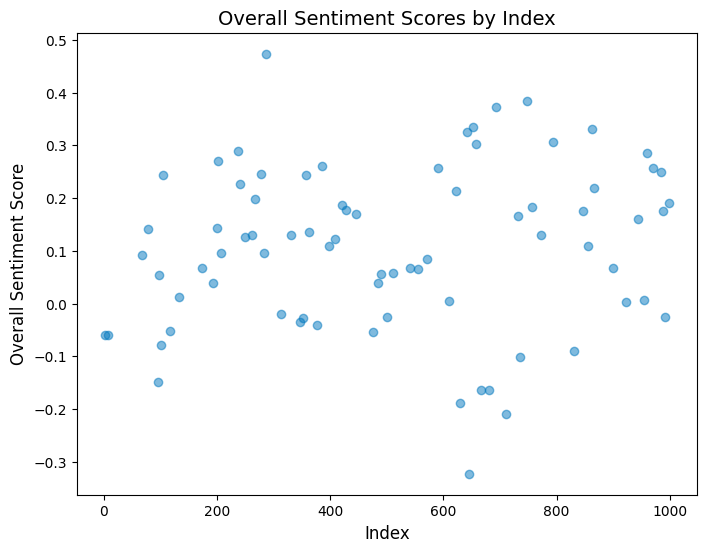

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a scatter plot with the index of the DataFrame as x and the Overall_sentiment_score column as y
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(news.index, news['overall_sentiment_score'], color='#0077be', alpha=0.5)

# Add labels and title
ax.set_xlabel('Index', fontsize=12)
ax.set_ylabel('Overall Sentiment Score', fontsize=12)
ax.set_title('Overall Sentiment Scores by Index', fontsize=14)

# Show the plot
plt.show()



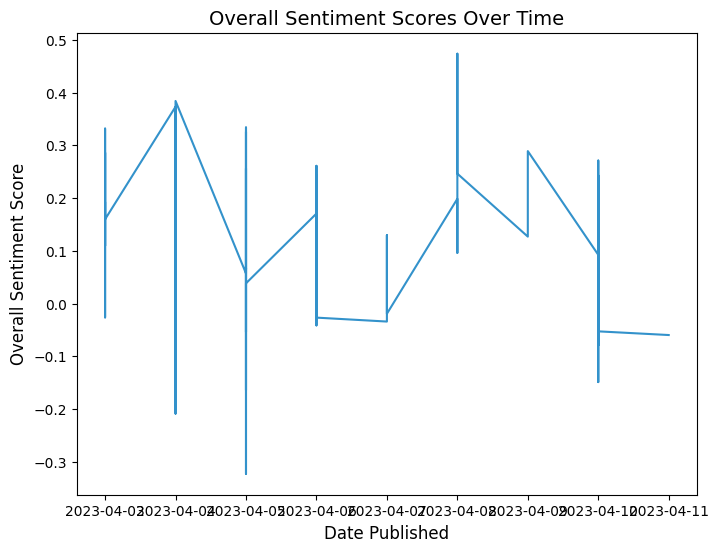

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sort the data by time_published column
news = news.sort_values('date')

# Create a line plot with the time_published column as x and the Overall_sentiment_score column as y
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(news['date'], news['overall_sentiment_score'], color='#0077be', alpha=0.8)

# Add labels and title
ax.set_xlabel('Date Published', fontsize=12)
ax.set_ylabel('Overall Sentiment Score', fontsize=12)
ax.set_title('Overall Sentiment Scores Over Time', fontsize=14)

# Show the plot
plt.show()


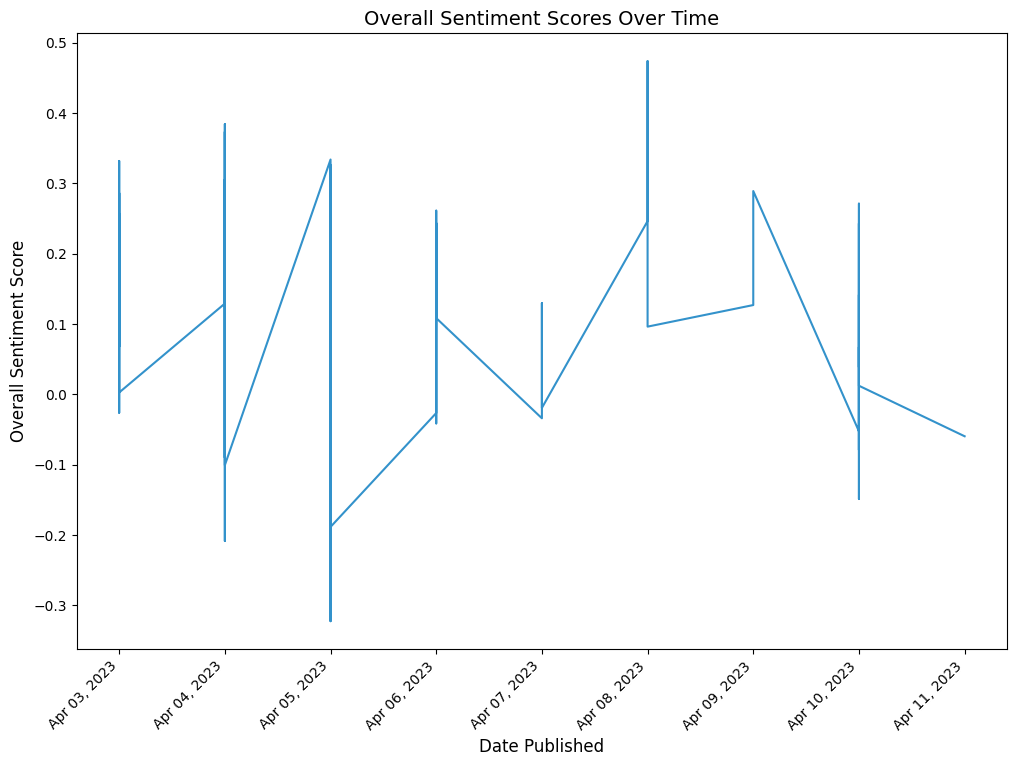

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates
#from mpldatacursor import datacursor


# Sort the data by time_published column
news = news.sort_values('date')

# Create a line plot with the time_published column as x and the Overall_sentiment_score column as y
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(news['date'], news['overall_sentiment_score'], color='#0077be', alpha=0.8)

# Add labels and title
ax.set_xlabel('Date Published', fontsize=12)
ax.set_ylabel('Overall Sentiment Score', fontsize=12)
ax.set_title('Overall Sentiment Scores Over Time', fontsize=14)

# Format the x-axis as dates
date_fmt = mpl_dates.DateFormatter('%b %d, %Y')
ax.xaxis.set_major_formatter(date_fmt)
plt.xticks(rotation=45, ha='right')


# Show the plot
plt.show()


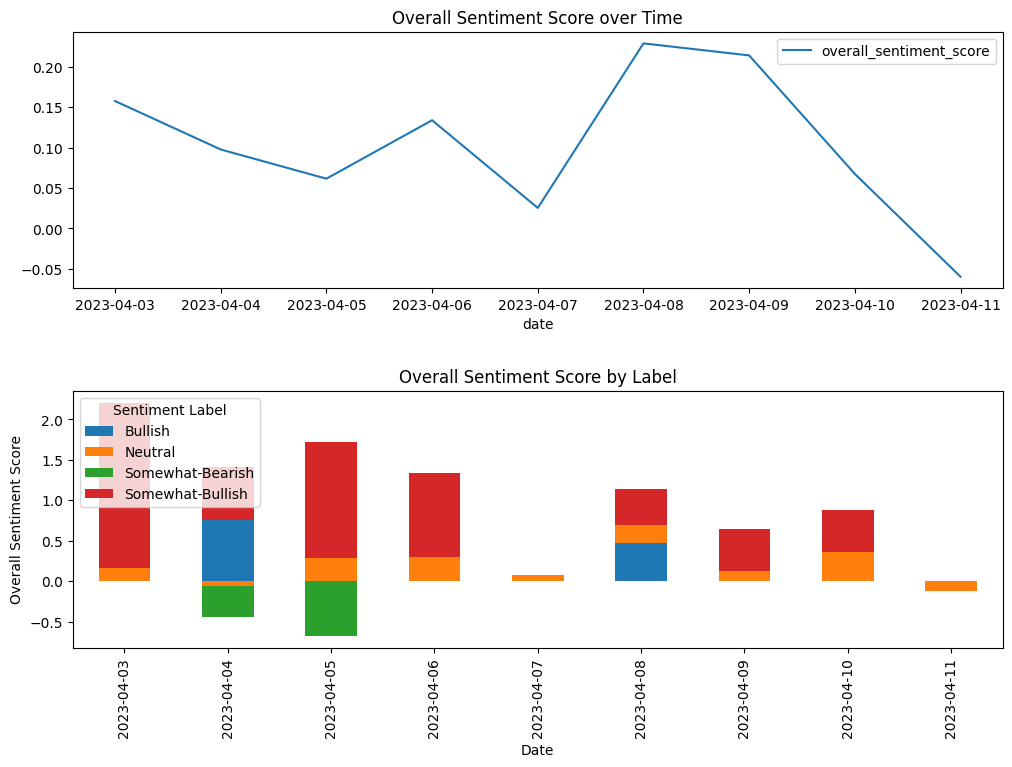

In [ ]:
# set the figure size and create subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,8))
fig.subplots_adjust(hspace=0.4)

# plot the line graph
pivot_table = news.pivot_table(index='date', values='overall_sentiment_score')
pivot_table.plot(kind='line', ax=ax1)
ax1.set_title("Overall Sentiment Score over Time", )

# plot the bar graph
news_bar = news.groupby(['date', 'overall_sentiment_label'])['overall_sentiment_score'].sum().unstack()
news_bar.plot(kind='bar', stacked=True, ax=ax2)
ax2.set_xlabel('Date')
ax2.set_ylabel('Overall Sentiment Score')
ax2.legend(title='Sentiment Label', loc='upper left')
ax2.set_title("Overall Sentiment Score by Label")

#plt.tight_layout()
plt.show()

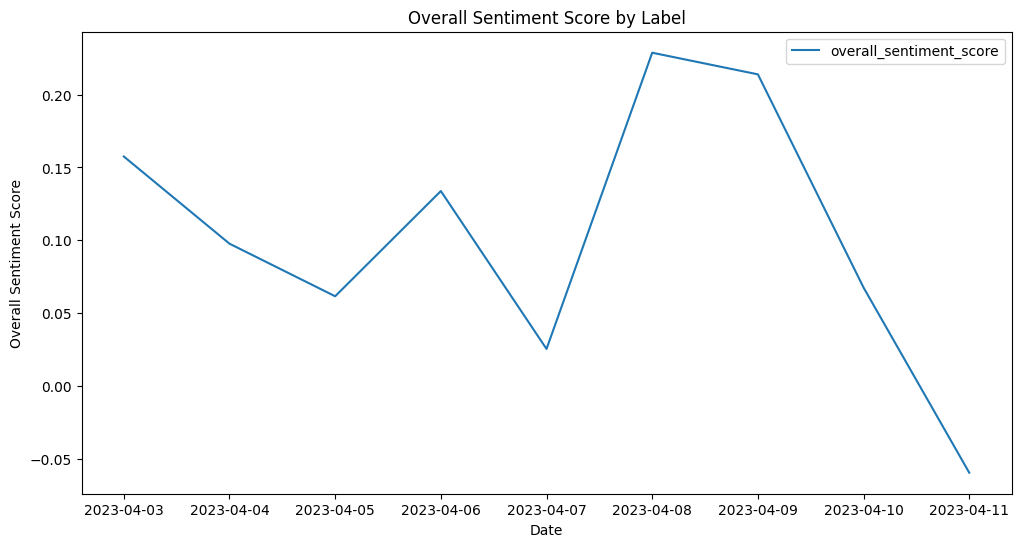

In [ ]:
import matplotlib.pyplot as plt

# create a pivot table to reshape the data
pivot_table = news.pivot_table(index='date', values='overall_sentiment_score')

# create a line plot
fig, ax = plt.subplots(figsize=(12,6))
pivot_table.plot(kind='line', ax=ax)

# add labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Overall Sentiment Score')
ax.set_title('Overall Sentiment Score by Label')

# show the plot
plt.show()


In [ ]:
pip install mpld3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import feedparser
import pandas as pd
import datetime

from GoogleNews import GoogleNews
import pandas as pd
import datetime

import requests
import pandas as pd
import mpld3
from google.colab import files
import os

In [ ]:
def exel_data(company):
  news = result_df.loc[result_df['ticker'] == company]
  news['time_published'] = pd.to_datetime(news['time_published'])
  news['date'] = news['time_published'].dt.date
  news.drop('time_published', axis=1, inplace=True)
  news = news.head(5)
  news.to_csv(f"{company}.csv", index=False)
  return


def NLP_graph(company):
  
  news = result_df.loc[result_df['ticker'] == company]
  news['time_published'] = pd.to_datetime(news['time_published'])
  news['date'] = news['time_published'].dt.date
  news.drop('time_published', axis=1, inplace=True)

  # set the figure size and create subplots
  fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,8))
  fig.subplots_adjust(hspace=0.4)

  # plot the line graph
  pivot_table = news.pivot_table(index='date', values='overall_sentiment_score')
  pivot_table.plot(kind='line', ax=ax1)
  ax1.set_title(company + " Overall Sentiment Score over Time", fontsize=24)

  # plot the bar graph
  news_bar = news.groupby(['date', 'overall_sentiment_label'])['overall_sentiment_score'].sum().unstack()
  news_bar.plot(kind='bar', stacked=True, ax=ax2)
  ax2.set_xlabel('Date')
  ax2.set_ylabel('Overall Sentiment Score')
  ax2.legend(title='Sentiment Label', loc='upper left')
  ax2.set_title(company + " Overall Sentiment Score by Label", fontsize=24)

  # Convert the figure to HTML format
  html_fig = mpld3.fig_to_html(fig)
  # Save the HTML to a file
  with open(f"{company}.png", 'w') as f:
      f.write(html_fig)
  files.download(company + ".png")
  
  return

<ipython-input-36-10ec62c0a66e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news['time_published'] = pd.to_datetime(news['time_published'])
<ipython-input-36-10ec62c0a66e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news['date'] = news['time_published'].dt.date
<ipython-input-36-10ec62c0a66e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-36-10ec62c0a66e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news['time_published'] = pd.to_datetime(news['time_published'])
<ipython-input-36-10ec62c0a66e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news['date'] = news['time_published'].dt.date
<ipython-input-36-10ec62c0a66e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-36-10ec62c0a66e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news['time_published'] = pd.to_datetime(news['time_published'])
<ipython-input-36-10ec62c0a66e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news['date'] = news['time_published'].dt.date
<ipython-input-36-10ec62c0a66e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-36-10ec62c0a66e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news['time_published'] = pd.to_datetime(news['time_published'])
<ipython-input-36-10ec62c0a66e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news['date'] = news['time_published'].dt.date
<ipython-input-36-10ec62c0a66e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

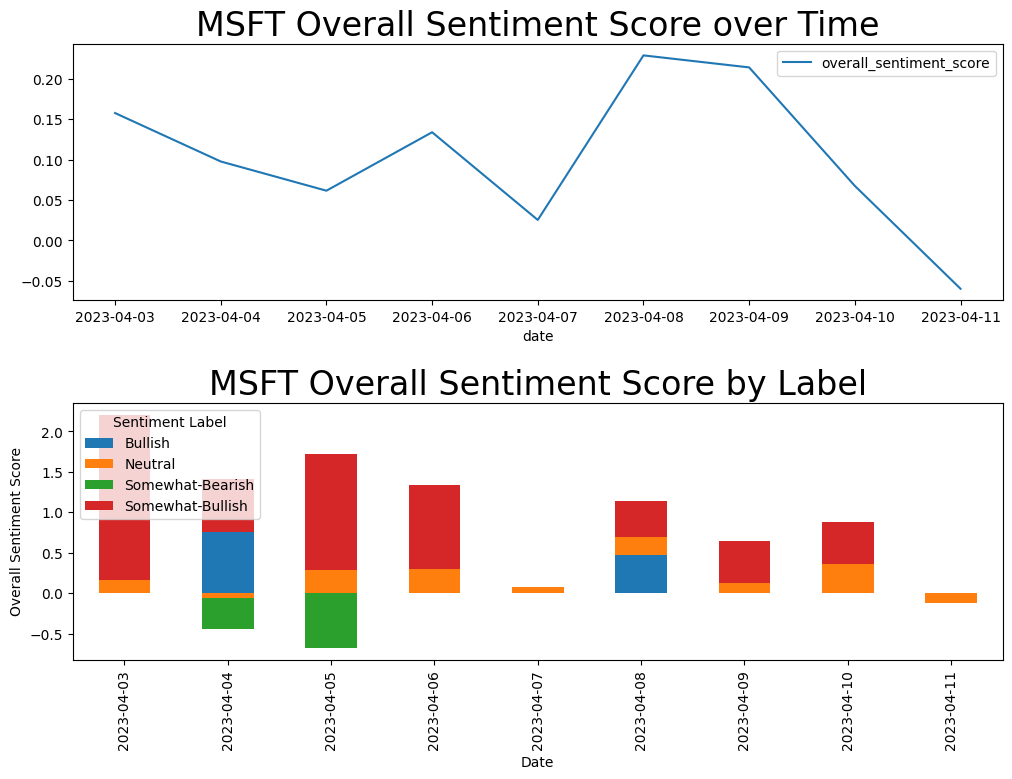

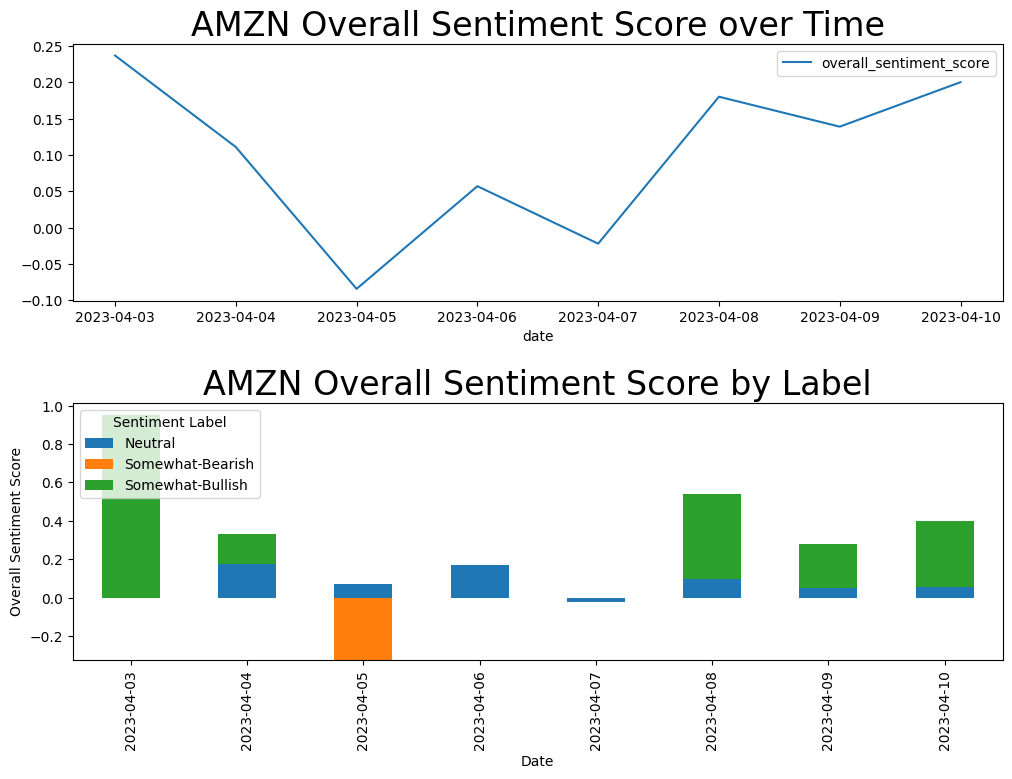

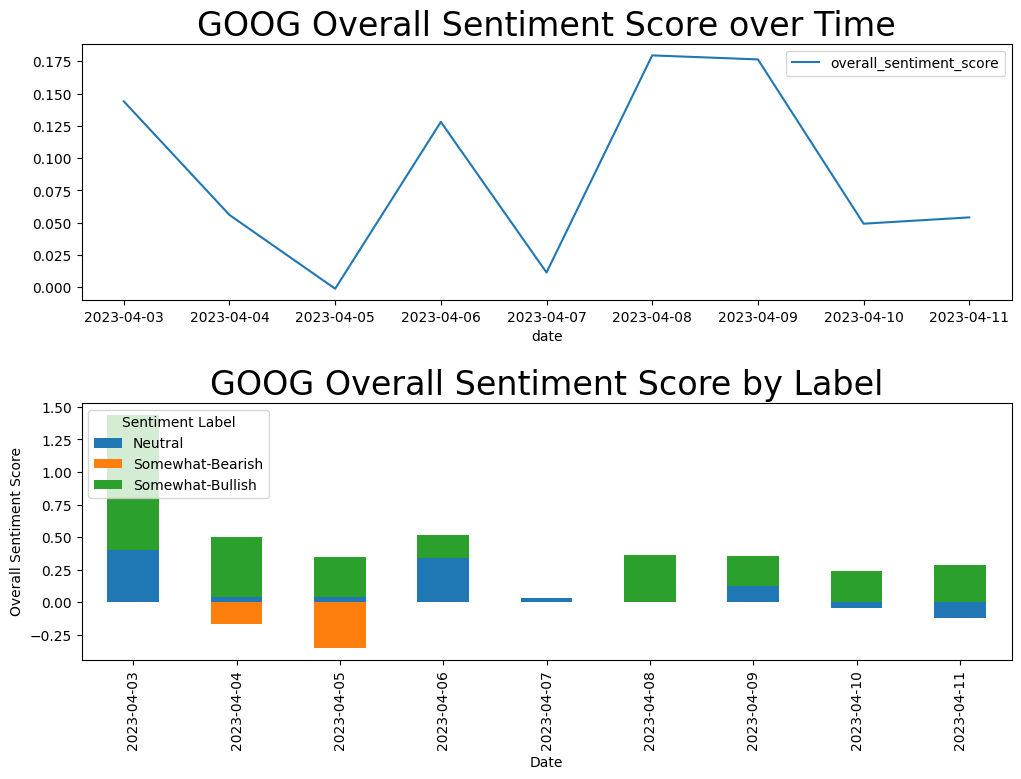

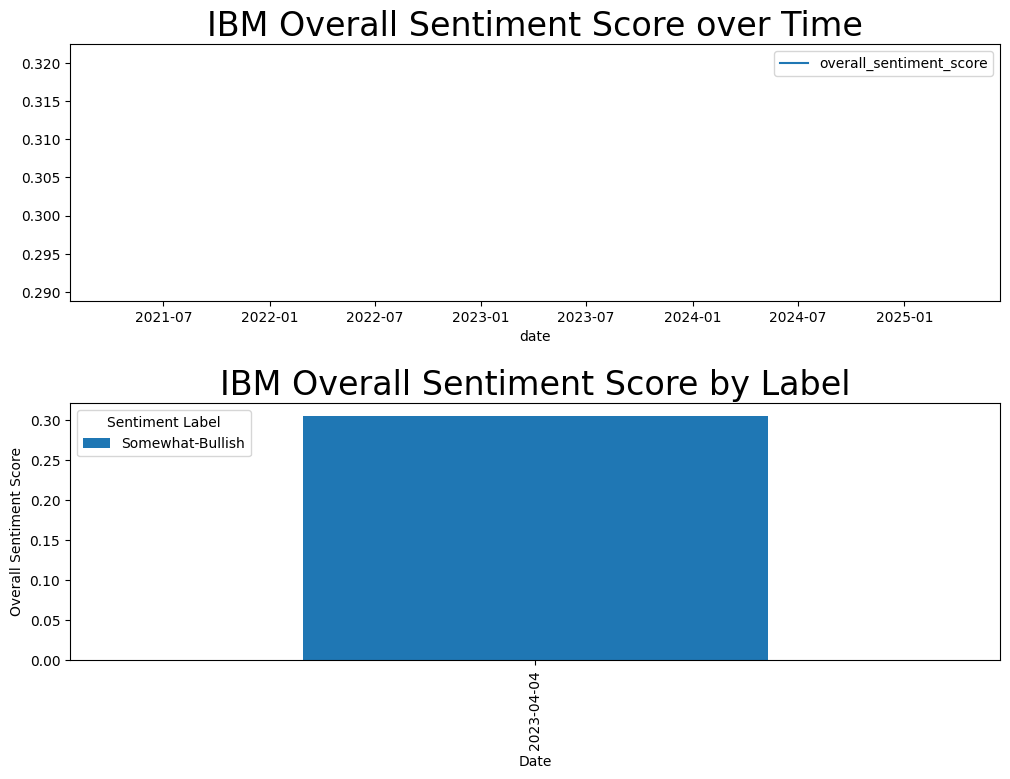

In [ ]:
company = ['MSFT','AMZN','GOOG','IBM']
for i in company:
  NLP_graph(i)
  news = result_df.loc[result_df['ticker'] == i]
  news = news.head(5)
  news.to_csv(f"{i}.csv", index=False)

In [ ]:
company = 'GOOG'
news = result_df.loc[result_df['ticker'] == company]
news = news.head(5)
news.to_csv(f"{company}.csv", index=False)
news

,ticker,relevance_score,ticker_sentiment_score,ticker_sentiment_label,title,time_published,overall_sentiment_score,overall_sentiment_label
3,GOOG,0.218161,0.180128,Somewhat-Bullish,"Amid big drop in sales, PC makers may soon be ...",2023-04-11 01:43:00,-0.059768,Neutral
9,GOOG,0.218161,0.180128,Somewhat-Bullish,"Amid big drop in sales, PC makers may soon be ...",2023-04-11 01:43:00,-0.059768,Neutral
22,GOOG,0.171851,0.218563,Somewhat-Bullish,"Smart Speaker Market size to grow by USD 16,65...",2023-04-11 00:00:00,0.281867,Somewhat-Bullish
43,GOOG,0.007134,0.074025,Neutral,Time to Spring-Clean...Your Stock Portfolio,2023-04-10 22:25:00,0.106006,Neutral
102,GOOG,0.150122,0.0,Neutral,Apple Macbook shipments lead PC drop as supply...,2023-04-10 16:55:00,-0.079281,Neutral
